In [70]:
from os import walk
testpath = 'imagens_vq/teste'
testimgs = next(walk(testpath), (None, None, []))[2]
encpath = 'imagens_vq/enc'
encimgs = next(walk(encpath), (None, None, []))[2]
decpath = 'imagens_vq/dec'
decimgs = next(walk(decpath), (None, None, []))[2]

In [71]:
imgsizes = [720*576, 256*256, 720*576, 512*512, 512*512]

In [72]:
lambdas = [1.0, 100.0]

In [73]:
encimgs_l = []
decimgs_l = []

for l in lambdas:
    temp = []
    for img in encimgs:
        spl = img.split("_")
        last = spl[len(spl) - 1]
        img_l = last[:len(last)-9].replace("t", "0")
        if(l == float(img_l)):
            temp.append(img)
    encimgs_l.append(temp)
    
    temp = []
    for img in decimgs:
        spl = img.split("_")
        last = spl[len(spl) - 1]
        img_l = last[:len(last)-9].replace("p", "0")
        if(l == float(img_l)):
            temp.append(img)
    decimgs_l.append(temp)
        

In [74]:
import os
import numpy as np

compressions = []

for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        orig_size = os.path.getsize(testpath + "/" + testimgs[img])
        enc_size = os.path.getsize(encpath + "/" + encimgs_l[l][img])
        temp.append(orig_size/enc_size)
    compressions.append(np.mean(temp))    

In [75]:
compressions

[14.513353251734552, 20.944992148449227]

In [76]:
import os

Rs = []

for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):     
        enc_size = os.path.getsize(encpath + "/" + encimgs_l[l][img])*8
        R = enc_size/imgsizes[img]
        temp.append(R)
    Rs.append(np.mean(temp))    

In [77]:
Rs

[0.5520727388358411, 0.39548835660204473]

In [78]:
import cv2
PSNRs = []
for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        img1 = cv2.imread(testpath + "/" + testimgs[img])
        img2 = cv2.imread(decpath + "/" + decimgs_l[l][img])
        psnr = cv2.PSNR(img1, img2)
        temp.append(psnr)
    PSNRs.append(np.mean(temp))    

In [79]:
PSNRs

[23.452588845159926, 21.63115334355342]

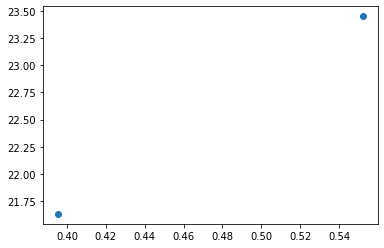

In [82]:
import matplotlib.pyplot as plt

plt.scatter(Rs, PSNRs)
plt.show()